📌 Available Datasets: ['06p07mid.sgy', '06p07far.sgy', '06p07nea.sgy', '06p07ful.sgy']


Enter the first dataset name (e.g., '01p01.sgy'):  06p07far.sgy
Do you want to compare two datasets? (yes/no):  yes
Enter the second dataset name:  06p07nea.sgy


📂 Loading dataset: 06p07far.sgy
📂 Opening file: /scratch/gilbreth/stiquesa/CCS/data/06p07/data/06p07far.sgy
📂 Loading second dataset: 06p07nea.sgy
📂 Opening file: /scratch/gilbreth/stiquesa/CCS/data/06p07/data/06p07nea.sgy


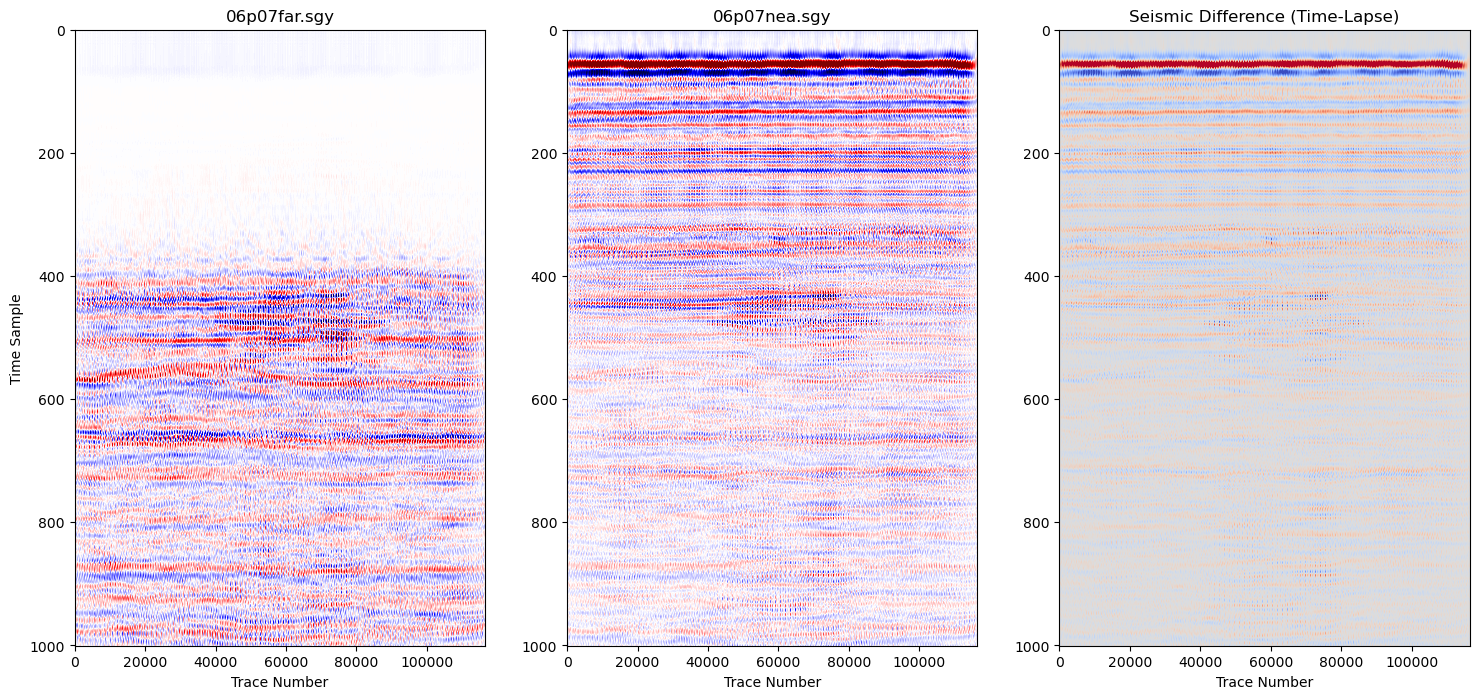

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import segyio
import plotly.graph_objects as go


# FIND ALL SEG-Y FILES IN "data" FOLDER
# ==============================
def get_available_datasets(data_folder="/scratch/gilbreth/stiquesa/data/Near/"):
    """=
    Finds all SEG-Y files in the specified data folder.
    """
    return [f for f in os.listdir(data_folder) if f.endswith(".sgy")]


#  READ SEISMIC DATA FROM SEG-Y FILE
# ==============================
def read_segy_file(filename, data_folder="/scratch/gilbreth/stiquesa/data/Near/"):
    """
    Reads a SEG-Y file and extracts seismic trace data.
    """
    file_path = os.path.join(data_folder, filename)
    
    if not os.path.exists(file_path):
        print(f"❌ Error: File '{file_path}' not found!")
        exit()
    
    print(f"📂 Opening file: {file_path}")
    
    with segyio.open(file_path, "r", ignore_geometry=True) as segyfile:
        traces = segyio.tools.collect(segyfile.trace[:])  # Load all traces
        return traces


# PLOT SEISMIC SECTION
# ==============================
def plot_seismic_section(traces, title="Seismic Section"):
    """
    Displays a seismic section using a colormap.
    """
    plt.figure(figsize=(12, 8))
    plt.imshow(traces.T, cmap="seismic", aspect="auto", vmin=-np.percentile(traces, 99), vmax=np.percentile(traces, 99))
    plt.colorbar(label="Amplitude")
    plt.xlabel("Trace Number")
    plt.ylabel("Time Sample")
    plt.title(title)
    plt.show()

# PLOT AMPLITUDE HISTOGRAM
# ==============================
def plot_amplitude_distribution(traces):
    """
    Displays the histogram of seismic trace amplitudes.
    """
    plt.figure(figsize=(10, 5))
    plt.hist(traces.flatten(), bins=100, color="blue", alpha=0.7)
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.title("Amplitude Distribution")
    plt.grid()
    plt.show()


# PLOT INDIVIDUAL TRACES
# ==============================
def plot_individual_traces(traces, num_traces=5):
    """
    Plots selected seismic traces.
    """
    plt.figure(figsize=(10, 6))
    for i in range(min(num_traces, len(traces))):
        plt.plot(traces[i] + i * np.max(traces) * 1.2, label=f"Trace {i+1}")
    plt.xlabel("Time Sample")
    plt.ylabel("Amplitude (Offset Applied)")
    plt.title("Individual Seismic Traces")
    plt.legend()
    plt.grid()
    plt.show()


#  PLOT INTERACTIVE HEATMAP
# ==============================
def plot_interactive_seismic(traces, title="Interactive Seismic Section"):
    """
    Creates an interactive heatmap for better exploration.
    """
    fig = go.Figure(data=go.Heatmap(z=traces.T, colorscale="seismic"))
    fig.update_layout(title=title, xaxis_title="Trace Number", yaxis_title="Time Sample")
    fig.show()


# COMPARE TWO TIME-LAPSE DATASETS
# ==============================
def compare_seismic_datasets(traces1, traces2, title1="Dataset 1", title2="Dataset 2"):
    """
    Compares two seismic datasets by plotting them side by side and showing the difference.
    """
    difference = traces2 - traces1  # Compute time-lapse difference

    fig, ax = plt.subplots(1, 3, figsize=(18, 8))

    # Plot first dataset
    ax[0].imshow(traces1.T, cmap="seismic", aspect="auto", vmin=-np.percentile(traces1, 99), vmax=np.percentile(traces1, 99))
    ax[0].set_title(title1)
    ax[0].set_xlabel("Trace Number")
    ax[0].set_ylabel("Time Sample")

    # Plot second dataset
    ax[1].imshow(traces2.T, cmap="seismic", aspect="auto", vmin=-np.percentile(traces2, 99), vmax=np.percentile(traces2, 99))
    ax[1].set_title(title2)
    ax[1].set_xlabel("Trace Number")

    # Plot difference
    ax[2].imshow(difference.T, cmap="coolwarm", aspect="auto", vmin=-np.percentile(difference, 99), vmax=np.percentile(difference, 99))
    ax[2].set_title("Seismic Difference (Time-Lapse)")
    ax[2].set_xlabel("Trace Number")

    plt.show()


#  MAIN EXECUTION
# ==============================
if __name__ == "__main__":
    # Step 1: Get available SEG-Y datasets
    datasets = get_available_datasets()
    
    if not datasets:
        print("❌ No SEG-Y files found in the 'data/' directory.")
        exit()
    
    print("📌 Available Datasets:", datasets)
    
    # Step 2: Allow user to select one or two datasets
    selected_file1 = input("Enter the first dataset name (e.g., '01p01.sgy'): ").strip()
    if selected_file1 not in datasets:
        print(f"❌ Error: '{selected_file1}' not found in 'data/'.")
        exit()

    compare_mode = input("Do you want to compare two datasets? (yes/no): ").strip().lower()
    selected_file2 = None
    if compare_mode == "yes":
        selected_file2 = input("Enter the second dataset name: ").strip()
        if selected_file2 not in datasets:
            print(f"❌ Error: '{selected_file2}' not found in 'data/'.")
            exit()

    print(f"📂 Loading dataset: {selected_file1}")
    seismic_traces1 = read_segy_file(selected_file1)

    if selected_file2:
        print(f"📂 Loading second dataset: {selected_file2}")
        seismic_traces2 = read_segy_file(selected_file2)
        compare_seismic_datasets(seismic_traces1, seismic_traces2, title1=selected_file1, title2=selected_file2)
    else:
        # Step 3: Plot seismic section
        plot_seismic_section(seismic_traces1, title=f"Seismic Section: {selected_file1}")

        # Step 4: Plot amplitude histogram
        plot_amplitude_distribution(seismic_traces1)

        # Step 5: Plot individual seismic traces
        plot_individual_traces(seismic_traces1, num_traces=5)

        # Step 6: Plot interactive heatmap
        plot_interactive_seismic(seismic_traces1, title=f"Interactive View: {selected_file1}")


In [13]:
import segyio

filename = "/scratch/gilbreth/stiquesa/CCS/data/10p10/2010 processing/data/10p10far.sgy"
with segyio.open(filename) as segyfile:

    # memory map file for faster reading 
    segyfile.mmap()

    # print binary header
    print(segyfile.bin)
    print(segyfile.bin[segyio.BinField.Traces])

    # Read headerword inline for trace 10
    print(segyfile.header[10][segyio.TraceField.INLINE_3D])

    #print inline and crossline axis
    print("Crossline")
    print(segyfile.xlines)
    print("Inline")
    print(segyfile.ilines)

    #read data along 1 crossline
    data = segyfile.iline[segyfile.ilines[150]]

{JobID: 0, LineNumber: 0, ReelNumber: 0, Traces: 561, AuxTraces: 0, Interval: 2000, IntervalOriginal: -32768, Samples: 1001, SamplesOriginal: 51614, Format: 1, EnsembleFold: -13922, SortingCode: 4, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 22204, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 1, SEGYRevisionMinor: 0, TraceFlag: 1, ExtendedHeaders: 0}
561
1720
Crossline
[ 898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  919  920  921  922  923  924  925
  926  927  928  929  930  931  932  933  934  935  936  937  938  939
  940  941  942  943  944  945  946  947  948  949  950  951  952  953
  954  955  956  957  958  959  960  961  962  963  964  9

array([[ 7.2575994e-03,  2.3720234e-03,  1.9099328e-03, ...,
         7.4962199e-02,  9.4528794e-02,  8.1537187e-02],
       [ 4.7681145e-03,  2.2111845e-03,  2.4742729e-03, ...,
         5.0423510e-02,  8.4124923e-02,  8.2696080e-02],
       [ 3.5734691e-03,  1.3005943e-03,  1.1093502e-03, ...,
         3.7055146e-02,  7.0338011e-02,  6.5362990e-02],
       ...,
       [-2.4461899e-02, -7.3710829e-03, -5.8461688e-03, ...,
        -6.5522790e-02, -7.4070156e-02, -4.9060225e-02],
       [-1.1430360e-02, -4.3682605e-03, -4.1906275e-03, ...,
        -4.9523514e-02, -3.9602380e-02, -8.7520033e-03],
       [-2.8977427e-04, -6.6109948e-05, -6.1740371e-05, ...,
        -2.5557425e-02, -3.5459250e-03,  2.2304226e-02]], dtype=float32)

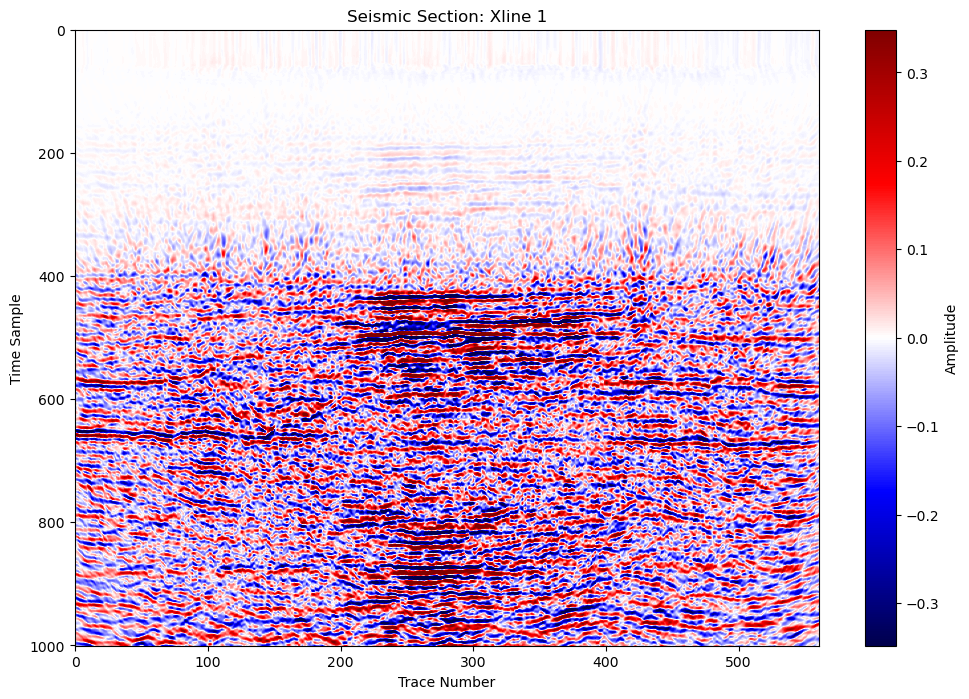

In [14]:
plot_seismic_section(data, title=f"Seismic Section: Xline 1")

In [1]:
import segyio

filename = "/scratch/gilbreth/stiquesa/data/Near/01p07nea.sgy"
with segyio.open(filename) as segyfile:

    # memory map file for faster reading 
    segyfile.mmap()

    # print binary header
    print(segyfile.bin)
    print(segyfile.bin[segyio.BinField.Traces])

    # Read headerword inline for trace 10
    print(segyfile.header[10][segyio.TraceField.INLINE_3D])

    #print inline and crossline axis
    print("Crossline")
    print(segyfile.xlines)
    print("Inline")
    print(segyfile.ilines)

    #read data along 1 crossline
    data = segyfile.iline[segyfile.ilines[150]]

{JobID: 0, LineNumber: 0, ReelNumber: 1636, Traces: 468, AuxTraces: 0, Interval: 2000, IntervalOriginal: -32768, Samples: 1001, SamplesOriginal: 51614, Format: 1, EnsembleFold: -13922, SortingCode: 4, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 21500, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 1, SEGYRevisionMinor: 0, TraceFlag: 1, ExtendedHeaders: 0}
468
1716
Crossline
[ 956  957  958  959  960  961  962  963  964  965  966  967  968  969
  970  971  972  973  974  975  976  977  978  979  980  981  982  983
  984  985  986  987  988  989  990  991  992  993  994  995  996  997
  998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011
 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022